<a href="https://colab.research.google.com/github/m4gnel/ASIET/blob/main/S5_AI/ML/LAB/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [33]:
try:
  boston = pd.read_csv('boston.csv')
except FileNotFoundError:
  print('File not found ! Ensure the dataset is in the correct directory.')

In [34]:
# Load data
try:
    bdf = pd.read_csv('boston.csv')
    print("CSV loaded successfully")
    print("Columns:", bdf.columns.tolist())

    # Identify target column
    target_col = None
    for col in ['MEDV', 'medv', 'target', 'TARGET', 'Price', 'price']:
        if col in bdf.columns:
            target_col = col
            break

    if target_col is None:
        raise ValueError("Target column not found")

    # Create binary classification target
    median_value = bdf[target_col].median()
    bdf['HighValue'] = (bdf[target_col] > median_value).astype(int)
    print(f"Created binary target: HighValue = 1 if {target_col} > {median_value:.2f}")

    # Select features
    X = bdf.iloc[:, 5].values.reshape(-1, 1)  # RM feature
    y = bdf['HighValue'].values

except Exception as e:
    print(f"Error loading data: {e}")
    exit()

CSV loaded successfully
Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Created binary target: HighValue = 1 if MEDV > 21.20


In [35]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Create and train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [37]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.78


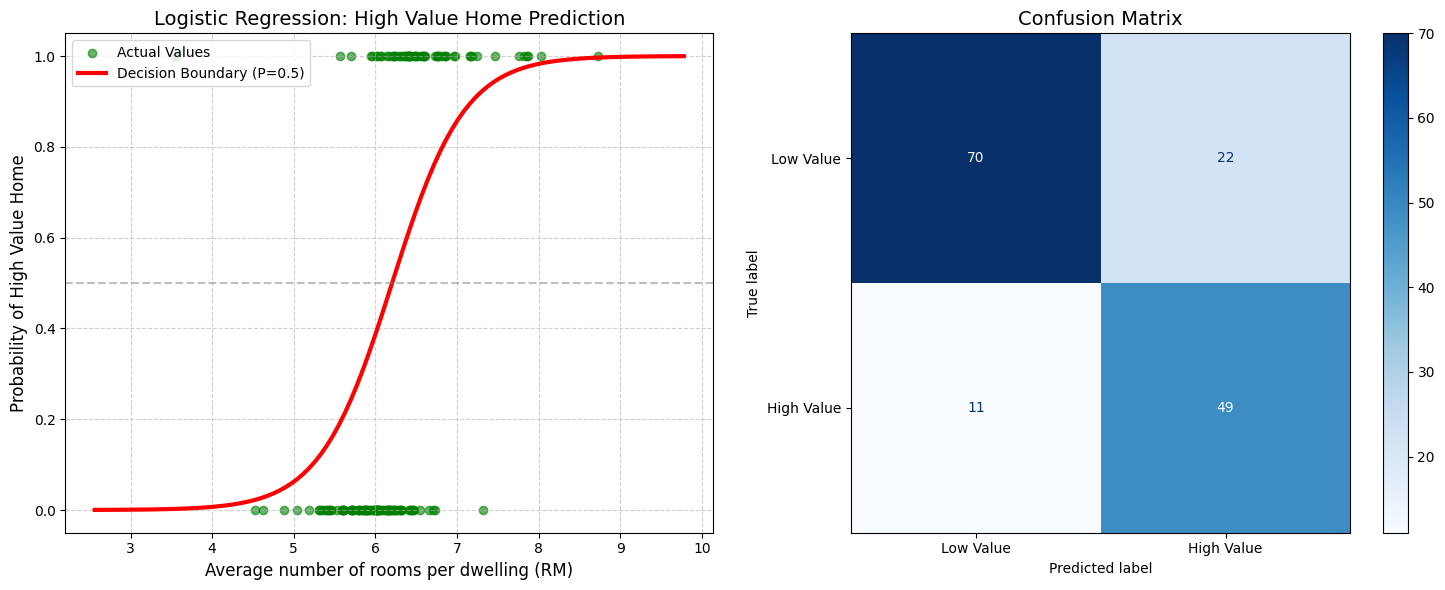

In [38]:
# Create figure with two subplots
plt.figure(figsize=(15, 6))

# Plot 1: Data points with decision boundary
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Actual Values')

# Create decision boundary
x_min, x_max = X.min() - 1, X.max() + 1
x_boundary = np.linspace(x_min, x_max, 100).reshape(-1, 1)
x_boundary_scaled = scaler.transform(x_boundary)
y_boundary = model.predict_proba(x_boundary_scaled)[:, 1]

plt.plot(x_boundary, y_boundary, color='red', linewidth=3,
         label='Decision Boundary (P=0.5)')
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

# Labels
plt.title("Logistic Regression: High Value Home Prediction", fontsize=14)
plt.xlabel("Average number of rooms per dwelling (RM)", fontsize=12)
plt.ylabel("Probability of High Value Home", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Value', 'High Value'])
disp.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix", fontsize=14)
plt.grid(False)

plt.tight_layout()
plt.show()

In [39]:
# Print confusion matrix details
print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (Low Value correctly identified): {cm[0,0]}")
print(f"False Positives (Low Value misclassified): {cm[0,1]}")
print(f"False Negatives (High Value misclassified): {cm[1,0]}")
print(f"True Positives (High Value correctly identified): {cm[1,1]}")

# Calculate derived metrics
precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0
recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix Breakdown:
True Negatives (Low Value correctly identified): 70
False Positives (Low Value misclassified): 22
False Negatives (High Value misclassified): 11
True Positives (High Value correctly identified): 49

Precision: 0.69
Recall: 0.82
F1 Score: 0.75
